In [ ]:
import pandas as pd

In [ ]:
df_noway_kr = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayKR.parquet")
df_noway_euw = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayEUW.parquet")
# df = pd.read_parquet(path=r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\test_data.parquet")

In [ ]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [ ]:
df_noway_kr.shape

In [ ]:
df_noway_kr.dtypes

In [ ]:
df_noway_kr

#### Game Duration in Minutes Bar Chart with Bins

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def game_duration_in_minutes_bar_chart(df: pd.DataFrame, bin_size=4):
    minutes_df = df["gameDuration_m_s"].apply(lambda x: int(x.split(":")[0]))

    min = minutes_df.min()
    min_bin = min if min % 2 == 0 else min - 1

    max = minutes_df.max()
    max_bin = max if max % 2 == 0 else max + 1

    bin_size = 4

    bin_edges = [x for x in range(min_bin, max_bin, bin_size)]

    hist, edges = np.histogram(minutes_df, bins=bin_edges)

    plt.bar(edges[:-1], hist, width=edges[1]-edges[0] - 0.1, color='blue', align='edge')

    plt.xlabel(f'Bins of size: {bin_size}')
    plt.ylabel('Frequency')
    plt.title(f'Game duration in minutes')

    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def game_duration_in_minutes_bar_chart(dataframes, names, bin_size=4):
    fig, axs = plt.subplots(1, len(dataframes), figsize=(12, 5))  # Adjust the figsize as needed

    for i, df in enumerate(dataframes):
        minutes_df = df["gameDuration_m_s"].apply(lambda x: int(x.split(":")[0]))

        min_val = minutes_df.min()
        min_bin = min_val if min_val % 2 == 0 else min_val - 1

        max_val = minutes_df.max()
        max_bin = max_val if max_val % 2 == 0 else max_val + 1

        bin_edges = [x for x in range(0, 60, bin_size)]

        hist, edges = np.histogram(minutes_df, bins=bin_edges)

        axs[i].bar(edges[:-1], hist, width=edges[1]-edges[0] - 0.2, color='blue', align='edge')

        axs[i].set_xlabel(f'Bins of size: {bin_size}')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Game duration in minutes - Dataset: Noway {names[i]}')

        axs[i].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()

In [ ]:
game_duration_in_minutes_bar_chart([df_noway_kr, df_noway_euw], ["Korea", "Europe"])

#### 5 Most played Champions -> Matchups (count, winrate)

In [ ]:
most_played_champion = df_noway_kr["championName"].value_counts().head(1).index[0]

filt_games = df_noway_kr["championName"] == most_played_champion
filt_wins = (df_noway_kr["championName"] == most_played_champion) & (df_noway_kr["win"] == True)

match_up_counts_series = pd.Series(df_noway_kr.loc[filt_games, "laneOpponent"].value_counts().head(10), name="Games")
match_up_wins_series = pd.Series(df_noway_kr.loc[filt_wins, "laneOpponent"].value_counts().head(10), name="Wins")
merged_series = pd.concat([match_up_counts_series, match_up_wins_series], axis="columns")
merged_series.fillna(0, inplace=True)
merged_series["Winrate"] = merged_series["Wins"] / merged_series["Games"] * 100

In [ ]:
# df_noway_kr.set_index("matchId", inplace=True)
df_noway_kr['gameCreation'].max() - df_noway_kr['gameCreation'].min()


df_noway_kr.set_index('gameCreation', inplace=True)
df_noway_kr

In [ ]:
df_2019 = df_noway_kr["goldEarned"].resample("W").mean()
df_2019.plot()

In [ ]:
df_noway_kr.head()

In [ ]:
games = df_noway_kr["championName"].value_counts()
stats = df_noway_kr.groupby("championName").agg({"win": "sum", "kills": "mean", "deaths": "mean", "assists": "mean"})

op_gg = pd.concat([games, stats], axis="columns")
op_gg["winrate"] = op_gg["win"] / op_gg["count"] * 100
op_gg


teamPosition
MIDDLE     0.640000
TOP        0.270000
JUNGLE     0.040000
SUPPORT    0.026667
BOTTOM     0.023333
Name: proportion, dtype: float64


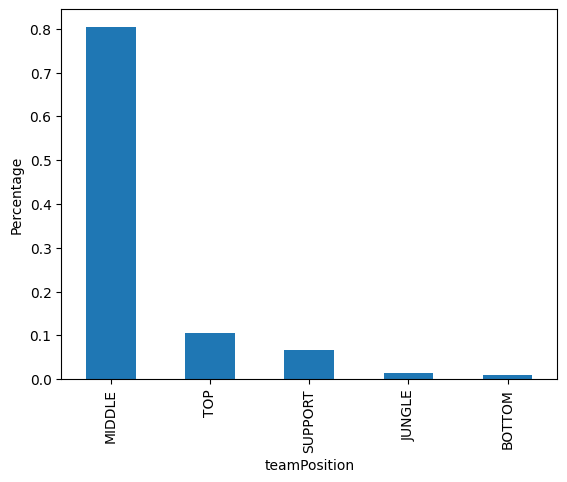

In [399]:
df_noway_kr["teamPosition"].value_counts(normalize=True).mul(100).plot(kind="bar", ylabel="Percentage")
print()
print(df_noway_euw["teamPosition"].value_counts(normalize=True))